In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt
import cv2

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_path='C:/Users/Shimul/Documents/Thesis room identification/preprocessed_dataset/train'
test_path='C:/Users/Shimul/Documents/Thesis room identification/preprocessed_dataset/test'
validation_path='C:/Users/Shimul/Documents/Thesis room identification/preprocessed_dataset/validation'

In [5]:
train_path

'C:/Users/Shimul/Documents/Thesis room identification/preprocessed_dataset/train'

## Scaling and resize using ImageDataGenerator


In [6]:
train_datagen=ImageDataGenerator(rescale=1./255 ,horizontal_flip=True,shear_range=0.2 ,zoom_range=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(500,500),
                                               batch_size=32,class_mode='categorical')

test_set=test_datagen.flow_from_directory(test_path,
                                               target_size=(500,500),
                                               batch_size=32,class_mode='categorical')

Found 184 images belonging to 4 classes.
Found 55 images belonging to 4 classes.


In [7]:
validation_datagen=ImageDataGenerator(rescale=(1./255))
validation_set=validation_datagen.flow_from_directory(validation_path,
                                               target_size=(500,500),
                                               batch_size=32,class_mode='categorical')

Found 27 images belonging to 4 classes.


In [8]:
import os
import numpy as np


In [9]:
random_image_path=test_path='C:/Users/Shimul/Documents/Thesis room identification/preprocessed_dataset/train/building/building2.png'

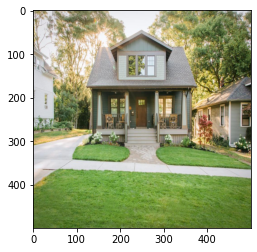

In [10]:
from tensorflow.keras.preprocessing import image
img=image.load_img(random_image_path)
plt.imshow(img)

In [11]:
#cv2.imread('/content/drive/My Drive/homedataset/train/home1/IMG_20200809_110313.jpg')

In [12]:
training_set.class_indices

{'building': 0, 'mosque': 1, 'temple': 2, 'tinshed': 3}

In [13]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

In [14]:
total_class=len(training_set.class_indices)
total_class

4

In [15]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential

In [16]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(500,500,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(total_class,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 500, 500, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 250, 250, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 250, 250, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [19]:
history=model.fit(training_set,epochs=10,steps_per_epoch=3)

Epoch 1/10
3/3 [==============================] - 17s 6s/step - loss: 134.5118 - accuracy: 0.3523
Epoch 2/10
3/3 [==============================] - 18s 6s/step - loss: 11.3066 - accuracy: 0.3750
Epoch 3/10
3/3 [==============================] - 12s 4s/step - loss: 1.6081 - accuracy: 0.2500
Epoch 4/10
3/3 [==============================] - 12s 4s/step - loss: 1.3335 - accuracy: 0.2812
Epoch 5/10
3/3 [==============================] - 12s 4s/step - loss: 1.2815 - accuracy: 0.3542
Epoch 6/10
3/3 [==============================] - 12s 4s/step - loss: 1.2265 - accuracy: 0.4375
Epoch 7/10
3/3 [==============================] - 12s 4s/step - loss: 1.2031 - accuracy: 0.4432
Epoch 8/10
3/3 [==============================] - 12s 4s/step - loss: 1.1507 - accuracy: 0.5000
Epoch 9/10
3/3 [==============================] - 12s 4s/step - loss: 1.1379 - accuracy: 0.5312
Epoch 10/10
3/3 [==============================] - 12s 4s/step - loss: 1.1320 - accuracy: 0.4688


Text(0.5, 1.0, 'Accuracy Graph')

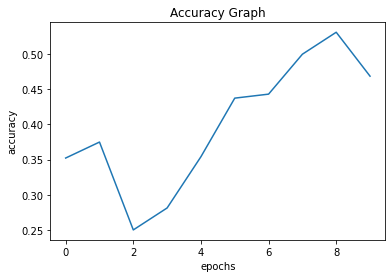

In [20]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Graph')

Text(0.5, 1.0, 'Loss Graph')

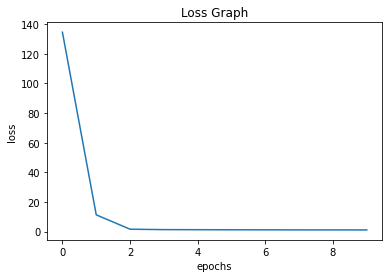

In [21]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss Graph')

building41.png


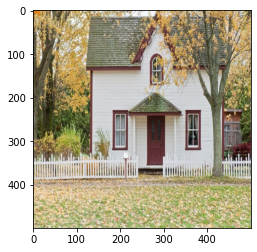

[[2.626937e-11 1.000000e+00 0.000000e+00 0.000000e+00]]
building42.png


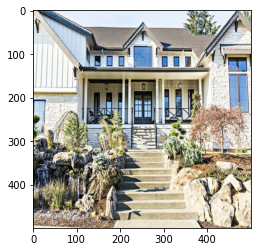

[[1.6663937e-23 1.4517563e-19 1.0000000e+00 0.0000000e+00]]
building43.png


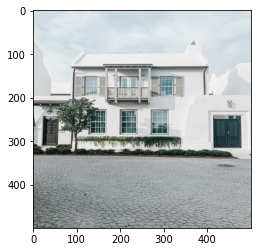

[[7.192578e-29 1.000000e+00 0.000000e+00 0.000000e+00]]
building44.png


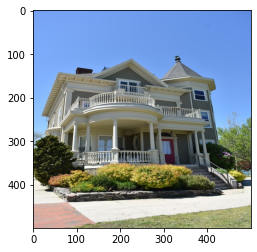

[[0.0000000e+00 2.3768603e-29 1.0000000e+00 0.0000000e+00]]
building45.png


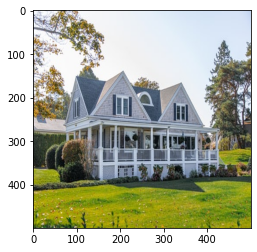

[[1. 0. 0. 0.]]
building46.png


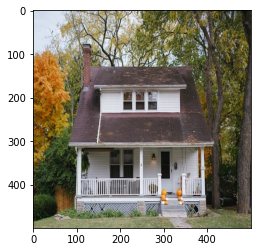

[[1. 0. 0. 0.]]
building47.png


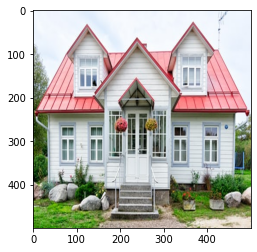

[[1.0000000e+00 1.0475105e-09 0.0000000e+00 0.0000000e+00]]
building48.png


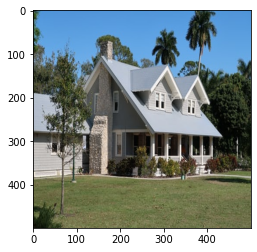

[[4.7320630e-19 1.0000000e+00 1.9335607e-14 0.0000000e+00]]
building49.png


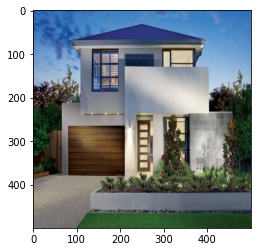

[[2.8276702e-12 1.0000000e+00 2.4614189e-22 0.0000000e+00]]
building50.png


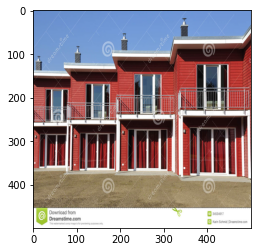

[[1.000000e+00 0.000000e+00 3.052965e-12 0.000000e+00]]
building51.png


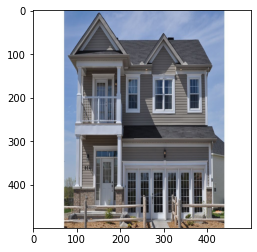

[[4.7645712e-36 1.0000000e+00 2.6737993e-17 0.0000000e+00]]
building52.png


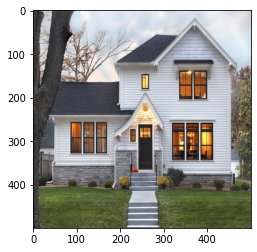

[[7.5455353e-02 9.2454463e-01 8.2710673e-26 0.0000000e+00]]


In [22]:
dir_path='C:/Users/Shimul/Documents/Thesis room identification/preprocessed_dataset/test/building'
for i in os.listdir(dir_path):
      print(i)
      img=image.load_img(dir_path+'/'+i ,target_size=(500,500))
      plt.imshow(img)
      plt.show()

      x=image.img_to_array(img)
      x=np.expand_dims(x,axis=0)
      images=np.vstack([x])
      val=model.predict(images)
      print(val)


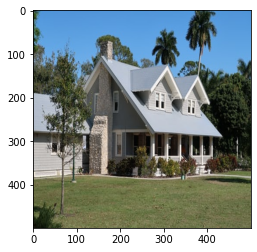

[[4.7320630e-19 1.0000000e+00 1.9335607e-14 0.0000000e+00]]


In [23]:
dir_test='C:/Users/Shimul/Documents/Thesis room identification/preprocessed_dataset/test/building/building48.png'
img=image.load_img(dir_test,target_size=(500,500))
plt.imshow(img)
plt.show()



x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
print(val)

In [24]:
val.max()

1.0

## Testing the model

In [25]:
score=model.evaluate(test_set)
score

2/2 [==============================] - 1s 735ms/step - loss: 1.0780 - accuracy: 0.6000


[1.078018307685852, 0.6000000238418579]

In [26]:
print('Accuracy of the model is : ',score[1]*100)

Accuracy of the model is :  60.00000238418579


## Classification report 

In [37]:
predicted_result=model.predict_classes(test_set)
predicted_result

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 0, 0, 2, 2, 2, 0, 1, 2, 2, 1], dtype=int64)

In [38]:
predicted_value=np.argmax(model.predict(test_set),axis=-1)
predicted_value

array([2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 0, 0,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2], dtype=int64)

In [42]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [44]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_set.classes,predicted_value))

Accuracy score:  0.2727272727272727


In [45]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(test_set.classes,predicted_value))

classification report 
               precision    recall  f1-score   support

           0       0.11      0.08      0.10        12
           1       0.35      0.44      0.39        16
           2       0.27      0.41      0.33        17
           3       0.00      0.00      0.00        10

    accuracy                           0.27        55
   macro avg       0.18      0.23      0.20        55
weighted avg       0.21      0.27      0.23        55



C:\Users\Shimul\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Another approach to calculate the classification report

In [46]:
predicted_array=model.predict(test_set)
predicted_array

array([[0.24359038, 0.40219444, 0.22516344, 0.12905169],
       [0.30666572, 0.25261015, 0.29025343, 0.15047072],
       [0.35926697, 0.22630382, 0.28113228, 0.13329686],
       [0.23942505, 0.34745327, 0.2066142 , 0.20650747],
       [0.05657273, 0.7048581 , 0.16713013, 0.07143907],
       [0.2934169 , 0.3022312 , 0.22401303, 0.18033892],
       [0.3458064 , 0.18737529, 0.32900724, 0.13781108],
       [0.2797721 , 0.2696085 , 0.32848498, 0.12213435],
       [0.26059625, 0.30021605, 0.21434827, 0.22483943],
       [0.23466918, 0.14680545, 0.5467145 , 0.07181087],
       [0.23798002, 0.3130051 , 0.2826587 , 0.16635616],
       [0.3348962 , 0.2348493 , 0.2666204 , 0.1636341 ],
       [0.2587528 , 0.32409123, 0.21550192, 0.20165412],
       [0.46296582, 0.18802252, 0.23520027, 0.11381136],
       [0.25860727, 0.26999113, 0.2413754 , 0.23002623],
       [0.26210013, 0.22428569, 0.42515284, 0.08846136],
       [0.23271282, 0.17948604, 0.49076536, 0.09703583],
       [0.03056963, 0.7089684 ,